In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.utils.np_utils import to_categorical                                   # convert to one-hot-encoding
import cv2

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


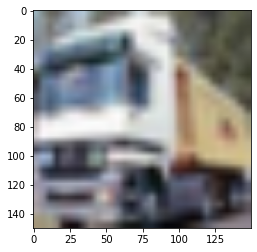

In [6]:
IMG_SIZE = 150
new_array = cv2.resize(X_train[1], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

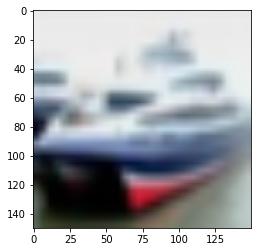

In [7]:
IMG_SIZE = 150
new_array = cv2.resize(X_test[1], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

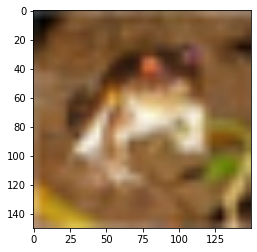

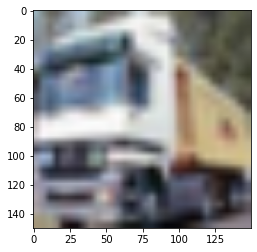

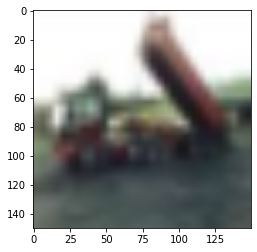

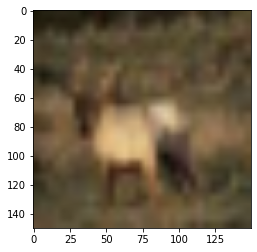

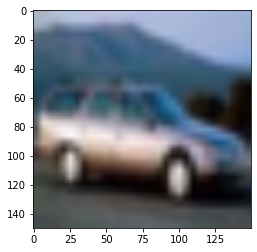

In [8]:
for i in range(0,5):
  IMG_SIZE = 150
  new_imgs = cv2.resize(X_train[i], (IMG_SIZE, IMG_SIZE))
  plt.imshow(new_imgs)
  plt.show()

In [9]:
X_train = X_train.reshape(-1, 32,32, 3).astype("float32") / 255
X_test = X_test.reshape(-1, 32,32, 3).astype("float32") /255

In [10]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [11]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), padding = 'same' ,activation = 'relu',  input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (5,5), padding = 'same' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (5,5), padding = 'same' ,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(300, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy",
              optimizer = keras.optimizers.RMSprop(learning_rate=0.002),
              metrics = [keras.metrics.CategoricalAccuracy()])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [17]:
model_history = model.fit(X_train, y_train, validation_split = 0.2, verbose = 2, epochs = 20, batch_size = 64, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.6794 - categorical_accuracy: 0.7676 - val_loss: 0.7466 - val_categorical_accuracy: 0.7473
Epoch 2/20
 - 6s - loss: 0.6705 - categorical_accuracy: 0.7671 - val_loss: 0.7955 - val_categorical_accuracy: 0.7285
Epoch 3/20
 - 7s - loss: 0.6636 - categorical_accuracy: 0.7700 - val_loss: 0.7177 - val_categorical_accuracy: 0.7632
Epoch 4/20
 - 7s - loss: 0.6565 - categorical_accuracy: 0.7715 - val_loss: 0.8172 - val_categorical_accuracy: 0.7285
Epoch 5/20
 - 7s - loss: 0.6455 - categorical_accuracy: 0.7799 - val_loss: 0.9187 - val_categorical_accuracy: 0.6963
Epoch 6/20
 - 7s - loss: 0.6483 - categorical_accuracy: 0.7768 - val_loss: 0.6951 - val_categorical_accuracy: 0.7664
Epoch 7/20
 - 7s - loss: 0.6407 - categorical_accuracy: 0.7757 - val_loss: 0.8462 - val_categorical_accuracy: 0.7198
Epoch 8/20
 - 6s - loss: 0.6315 - categorical_accuracy: 0.7805 - val_loss: 0.7210 - val_categorical_accuracy: 0.7680
Epoch 9/20
 - 

In [20]:
model_evaluate = model.evaluate(X_test, y_test)

print('Loss = ', model_evaluate[0])
print('Accuracy = ', model_evaluate[1]*100)

10000/10000 [==============================] - 1s 119us/step
Loss =  0.7815286407470703
Accuracy =  73.97000193595886


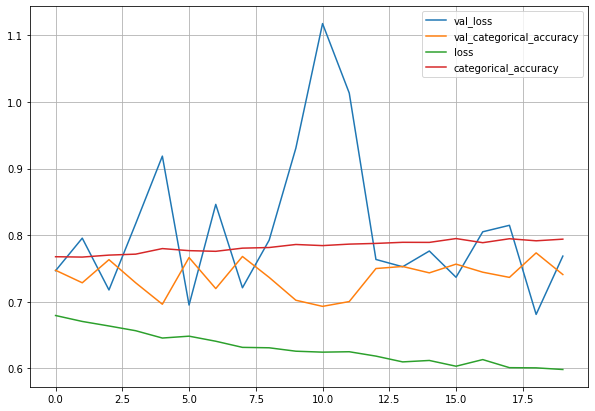

In [21]:
pd.DataFrame(model_history.history).plot(figsize = (10,7))
plt.gca()
plt.grid(True)
plt.show()

In [22]:
predicted_classes=model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [23]:
y_test = y_test.argmax(1)

In [24]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

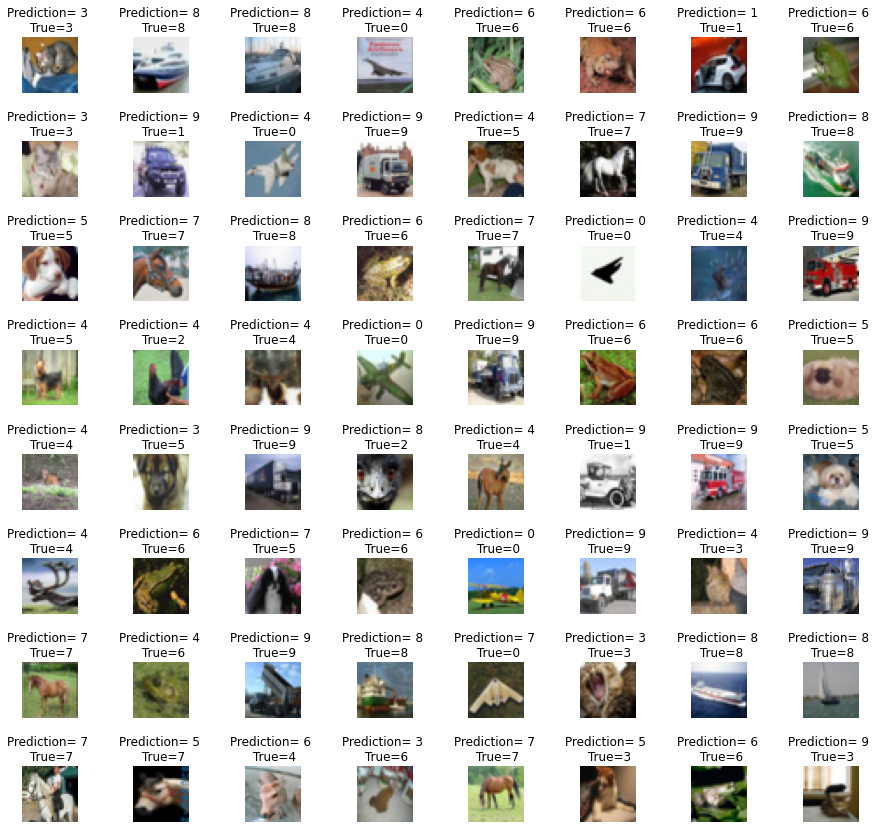

In [25]:
L=8
W=8
fig,axes=plt.subplots(L,W,figsize=(15,15))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {} \n True={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)